In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

## データセットの読み込み・整形

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [84]:
x_train = x_train.astype('float32')   # int型をfloat32型に変換
x_test = x_test.astype('float32')
x_train /= 255                        # [0-255]の値を[0.0-1.0]に変換
x_test /= 255
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


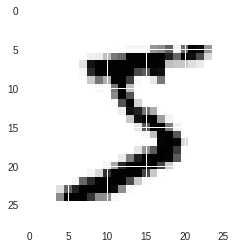

In [85]:
plt.imshow(x_train[0])

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

CNN入力用に4次元へ拡張

In [0]:
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]

## モデルの定義

In [0]:
batch_size = 128
num_classes = 10
epochs = 20
img_rows,img_cols = x_train.shape[1],x_train.shape[2]
input_shape = (img_rows, img_cols, 1)

In [0]:
model = Sequential()
early_stopping = EarlyStopping(monitor='loss', patience=2)
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [98]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 123s 2ms/step - loss: 0.2403 - acc: 0.9251 - val_loss: 0.0589 - val_acc: 0.9817
Epoch 2/20
14080/60000 [======>.......................] - ETA: 1:30 - loss: 0.0979 - acc: 0.9722

60000/60000 [==============================] - 123s 2ms/step - loss: 0.0873 - acc: 0.9746 - val_loss: 0.0444 - val_acc: 0.9849
Epoch 3/20
39936/60000 [==================>...........] - ETA: 39s - loss: 0.0717 - acc: 0.9786

60000/60000 [==============================] - 122s 2ms/step - loss: 0.0691 - acc: 0.9794 - val_loss: 0.0353 - val_acc: 0.9875
Epoch 4/20
49664/60000 [=======================>......] - ETA: 20s - loss: 0.0590 - acc: 0.9824

60000/60000 [==============================] - 122s 2ms/step - loss: 0.0579 - acc: 0.9826 - val_loss: 0.0321 - val_acc: 0.9893
Epoch 5/20
53376/60000 [=========================>....] - ETA: 12s - loss: 0.0516 - acc: 0.9844

60000/60000 [==============================] - 121s 2ms/step - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0366 - val_acc: 0.9866
Epoch 6/20
54784/60000 [==========================>...] - ETA: 10s - loss: 0.0498 - acc: 0.9851

60000/60000 [==============================] - 121s 2ms/step - loss: 0.0495 - acc: 0.9850 - val_loss: 0.0319 - val_acc: 0.9894
Epoch 7/20
55296/60000 [==========================>...] - ETA: 9s - loss: 0.0475 - acc: 0.9861

60000/60000 [==============================] - 121s 2ms/step - loss: 0.0474 - acc: 0.9861 - val_loss: 0.0298 - val_acc: 0.9906
Epoch 8/20
55552/60000 [==========================>...] - ETA: 8s - loss: 0.0456 - acc: 0.9868

60000/60000 [==============================] - 121s 2ms/step - loss: 0.0456 - acc: 0.9867 - val_loss: 0.0294 - val_acc: 0.9910
Epoch 9/20
55680/60000 [==========================>...] - ETA: 8s - loss: 0.0437 - acc: 0.9873

60000/60000 [==============================] - 120s 2ms/step - loss: 0.0440 - acc: 0.9874 - val_loss: 0.0315 - val_acc: 0.9908
Epoch 10/20
55424/60000 [==========================>...] - ETA: 8s - loss: 0.0408 - acc: 0.9879

60000/60000 [==============================] - 120s 2ms/step - loss: 0.0423 - acc: 0.9875 - val_loss: 0.0290 - val_acc: 0.9910
Epoch 11/20
55296/60000 [==========================>...] - ETA: 9s - loss: 0.0438 - acc: 0.9873

60000/60000 [==============================] - 120s 2ms/step - loss: 0.0434 - acc: 0.9875 - val_loss: 0.0315 - val_acc: 0.9904
Epoch 12/20
55296/60000 [==========================>...] - ETA: 9s - loss: 0.0428 - acc: 0.9879

60000/60000 [==============================] - 120s 2ms/step - loss: 0.0429 - acc: 0.9879 - val_loss: 0.0298 - val_acc: 0.9913


In [99]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029769323450732917
Test accuracy: 0.9913


In [100]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               589952    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
__________